In [1]:
pip install torch torchvision transformers pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# اختيار نموذج لاستخراج الميزات (VGG16 أو ResNet50)
def extract_features(image_path, model_name='vgg16'):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # تحميل النموذج
    if model_name == 'vgg16':
        model = models.vgg16(pretrained=True).features.eval().to(device)
    elif model_name == 'resnet50':
        model = models.resnet50(pretrained=True).to(device)
    else:
        raise ValueError("Select 'vgg16' or 'resnet50'")

    # تحويل الصورة
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    # استخراج الميزات
    with torch.no_grad():
        if model_name == 'resnet50':
            features = model(image)
        else:
            features = model(image).flatten()

    return features.cpu()

# نموذج Transformer (BLIP) لإنشاء التسمية التوضيحية
def generate_caption(image_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

    image = Image.open(image_path).convert("RGB")
    inputs = processor(image, return_tensors="pt").to(device)

    with torch.no_grad():
        output = model.generate(**inputs)

    caption = processor.batch_decode(output, skip_special_tokens=True)[0]
    return caption

# تجربة الكود
image_path = "/content/ggg.jpg"  # ضع مسار الصورة هنا
features = extract_features(image_path, model_name='vgg16')  # استخراج الميزات
caption = generate_caption(image_path)  # إنشاء الوصف

print("Extracted Features Shape:", features.shape)
print("Generated Caption:", caption)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 68.5MB/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor.

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Extracted Features Shape: torch.Size([25088])
Generated Caption: a kitten walking through the grass


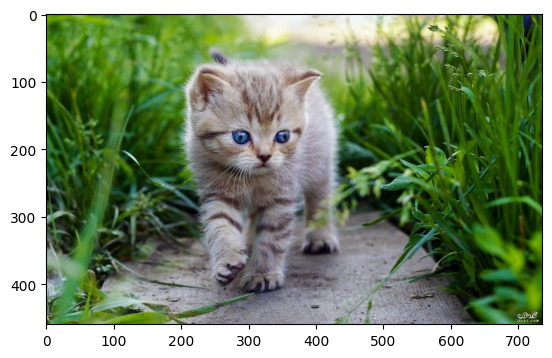

In [4]:
import matplotlib.pyplot as plt
img_path = "/content/ggg.jpg"
img = plt.imread(img_path)
plt.imshow(img)
plt.show()